### author by yangshichen
### 注意：脚本仅供参考，使用前请仔细阅读

### 加载R包

In [2]:
library(Seurat)
library(ggplot2)
library(future)
library(tidyverse)
library(harmony)
library(SeuratDisk)
library(pheatmap)
library(ggpubr)
library(ggchicklet)
library(ggsci)
library(magrittr)
library(ggh4x)
library(rstatix)
library(ggsignif)
library(ggnewscale)
library(patchwork)
library(gapminder)
library(ggprism)
library(dplyr)
library(ggplotify)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程序包：Rcpp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


载入程序包：‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



载入程序包：‘rstatix’


The following object is masked from ‘package:stats’:

    filter




### 加载数据

In [182]:
tmp <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/sample_information.csv",check.names = F,header = T))
tmp$stage <- factor(tmp$stage, levels = c("HDs","IRs","INRs"))
tmp

sample,sex,age,stage,scRNA,scATAC,WGS,scRNA_cellnumber,scATAC_cellnumber,ART_time,CD4,CD8,CD4/CD8
<chr>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
HD-H134,male,53,HDs,1,1,1,46020,8038,NA,579,319,1.8150470
HD-H135,male,26,HDs,1,1,1,43256,10388,NA,595,754,0.7891247
HD-H136,male,28,HDs,1,1,1,26197,10146,NA,1035,428,2.4182243
HD-H137,male,31,HDs,1,1,1,14338,6431,NA,852,779,1.0937099
HD-H138,male,32,HDs,1,1,1,25807,9236,NA,667,1040,0.6413462
HD-H140,male,28,HDs,1,1,1,19559,7293,NA,908,603,1.5058043
HD-H141,male,29,HDs,1,1,1,18360,6954,NA,1064,445,2.3910112
HD-H143,male,33,HDs,1,1,1,17570,6081,NA,889,1144,0.7770979
HD-H145,male,39,HDs,1,1,1,14954,6963,NA,576,581,0.9913941


In [183]:
tmp_sorted <- tmp %>% group_by(stage) %>% arrange(stage, age) %>% ungroup()
tmp_sorted$sample <- factor(tmp_sorted$sample, levels = tmp_sorted$sample)
tmp_sorted$scRNA_cellnumber <- log(tmp_sorted$scRNA_cellnumber,10)
tmp_sorted$scATAC_cellnumber <- log(tmp_sorted$scATAC_cellnumber,10)
tmp_sorted

sample,sex,age,stage,scRNA,scATAC,WGS,scRNA_cellnumber,scATAC_cellnumber,ART_time,CD4,CD8,CD4/CD8
<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>
HD-H135,male,26,HDs,1,1,1,4.636046,4.016532,NA,595,754,0.7891247
HD-H136,male,28,HDs,1,1,1,4.418252,4.006295,NA,1035,428,2.4182243
HD-H140,male,28,HDs,1,1,1,4.291347,3.862906,NA,908,603,1.5058043
HD-H141,male,29,HDs,1,1,1,4.263873,3.842235,NA,1064,445,2.3910112
HD-H137,male,31,HDs,1,1,1,4.156489,3.808279,NA,852,779,1.0937099
HD-H154,male,31,HDs,1,1,1,4.435207,3.833530,NA,NA,NA,NA
HD-H138,male,32,HDs,1,1,1,4.411738,3.965484,NA,667,1040,0.6413462
HD-H311,male,32,HDs,1,1,1,4.300008,3.826787,NA,489,367,1.3324251
HD-H143,male,33,HDs,1,1,1,4.244772,3.783975,NA,889,1144,0.7770979


In [139]:
tmp_sorted1 <- subset(tmp_sorted,stage%in% c("INRs"))
tmp_sorted1

sample,sex,age,stage,scRNA,scATAC,WGS,scRNA_cellnumber,scATAC_cellnumber
<fct>,<chr>,<int>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>
PD-H228,male,28,INRs,1,1,1,4.318898,3.738225
PD-H263,male,31,INRs,1,1,1,4.165333,3.698275
PD-H237,male,33,INRs,1,1,1,4.119256,4.054919
PD-H288,male,33,INRs,1,1,1,4.329906,3.513084
PD-H289,male,34,INRs,1,1,1,4.220709,3.763727
PD-H247,male,35,INRs,1,1,1,4.340266,3.865222
PD-H210,male,36,INRs,1,1,1,4.291102,3.826399
PD-H240,male,36,INRs,1,1,1,4.120212,4.000000
PD-H258,male,36,INRs,1,1,1,4.285962,3.970393


In [135]:
max(tmp_sorted1$age)

[1] 76

In [136]:
min(tmp_sorted1$age)

[1] 28

### 性别

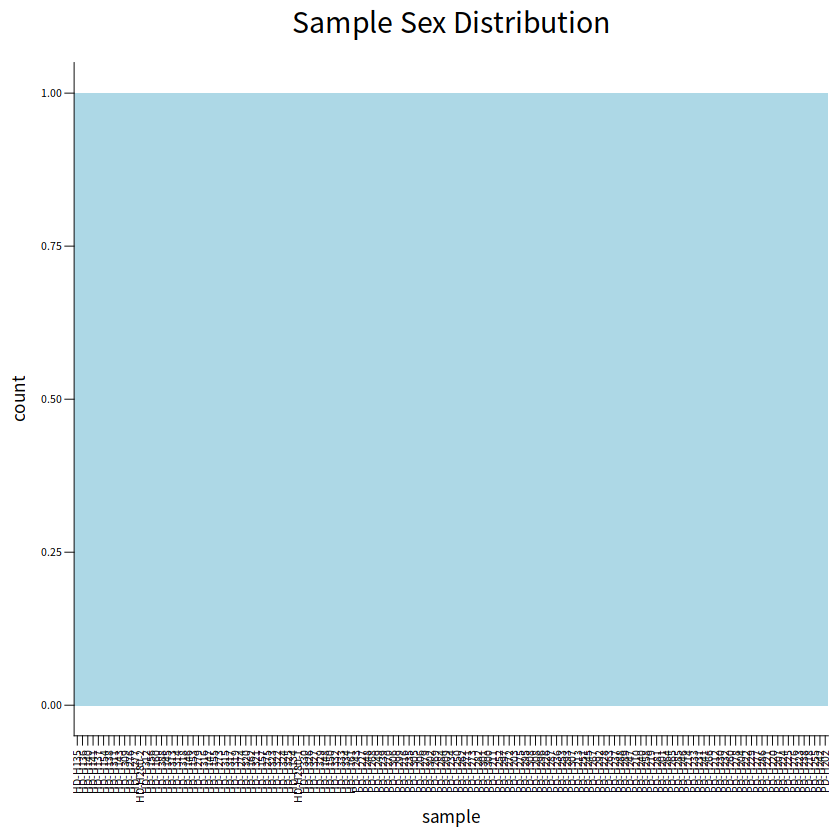

In [50]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

p <- ggplot(tmp_sorted, aes(x = sample, fill = sex)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('lightblue')) +
        labs(title = "Sample Sex Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/sex.pdf",p,width=15,height=2)

### 分组

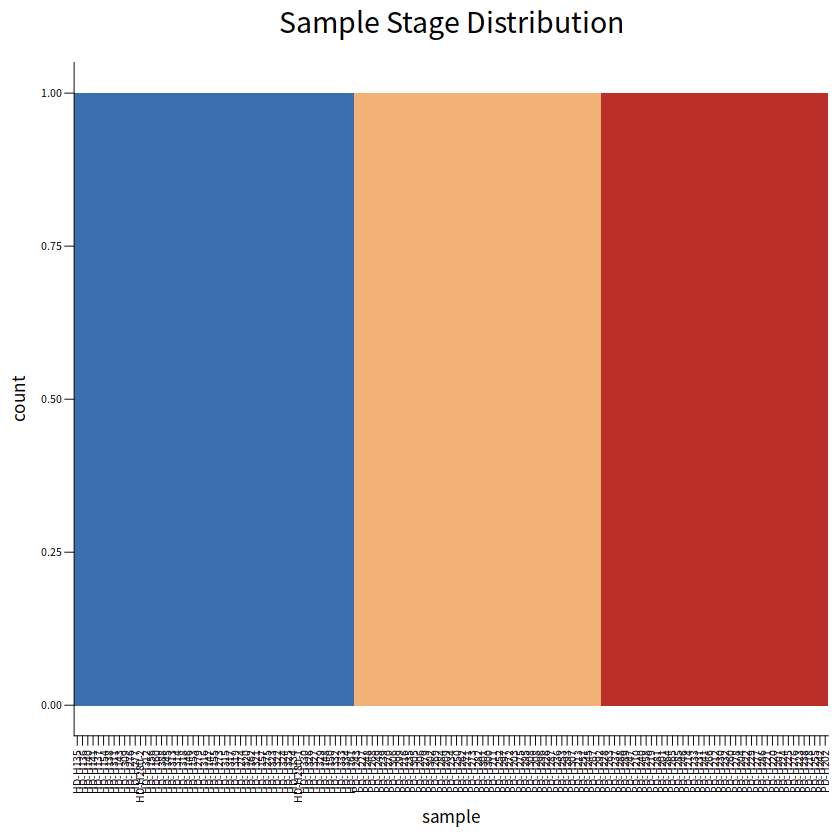

In [51]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

p <- ggplot(tmp_sorted, aes(x = sample, fill = stage)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('#3A6FB0', '#F2B276', '#BB2F29')) +
        labs(title = "Sample Stage Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/stage.pdf",p,width=15,height=2)

### 年龄

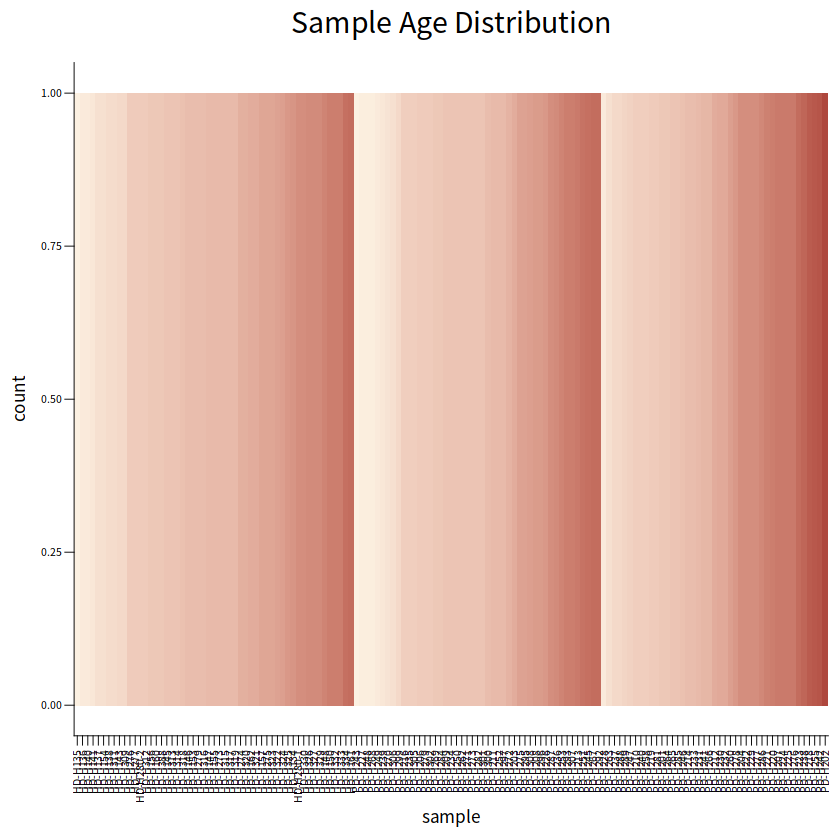

In [56]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

p <- ggplot(tmp_sorted, aes(x = sample, fill = age)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_gradient(low = '#FCF1E2', high = '#AE473D') +
        labs(title = "Sample Age Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/age.pdf",p,width=15,height=2)

### ART治疗时间

In [10]:
tmp <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/INRs/数据/clinicalinformation.csv",check.names = F,header = T))
tmp <- tmp %>% arrange(Age) %>% ungroup()
tmp$Sample <- factor(tmp$Sample, levels = tmp$Sample)
tmp

Sample,Group,Gender,Age,Treat time,Baseline viral load (cp/mL),Viral load (cp/mL),Baseline CD4 count (/μL),CD4 count (/μL),CD8 count(/μL),CD4/CD8 Ratio,ART regimen,INSTI
<fct>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
PD-H228,INRs,M,28,5,0.0,0.0,100,261,659,0.3960546,BIC/FTC/TAF,Yes
PD-H263,INRs,M,31,5,10511.0,0.0,139,249,623,0.3996790,EVG/c/FTC/TAF,Yes
PD-H237,INRs,M,33,9,1900.0,0.0,145,241,337,0.7151335,BIC/FTC/TAF,Yes
PD-H288,INRs,M,33,5,0.0,0.0,134,236,371,0.6361186,3TC/DTG,Yes
PD-H289,INRs,M,34,5,0.0,0.0,32,229,823,0.2782503,BIC/FTC/TAF,Yes
PD-H247,INRs,M,35,7,149.0,0.0,49,240,667,0.3598201,BIC/FTC/TAF,Yes
PD-H210,INRs,M,36,10,20.0,0.0,56,240,1010,0.2376238,BIC/FTC/TAF,Yes
PD-H240,INRs,M,36,8,0.0,0.0,47,260,474,0.5485232,3TC+EFV+TDF,No
PD-H258,INRs,M,36,7,55.4,0.0,29,235,605,0.3884298,BIC/FTC/TAF,Yes


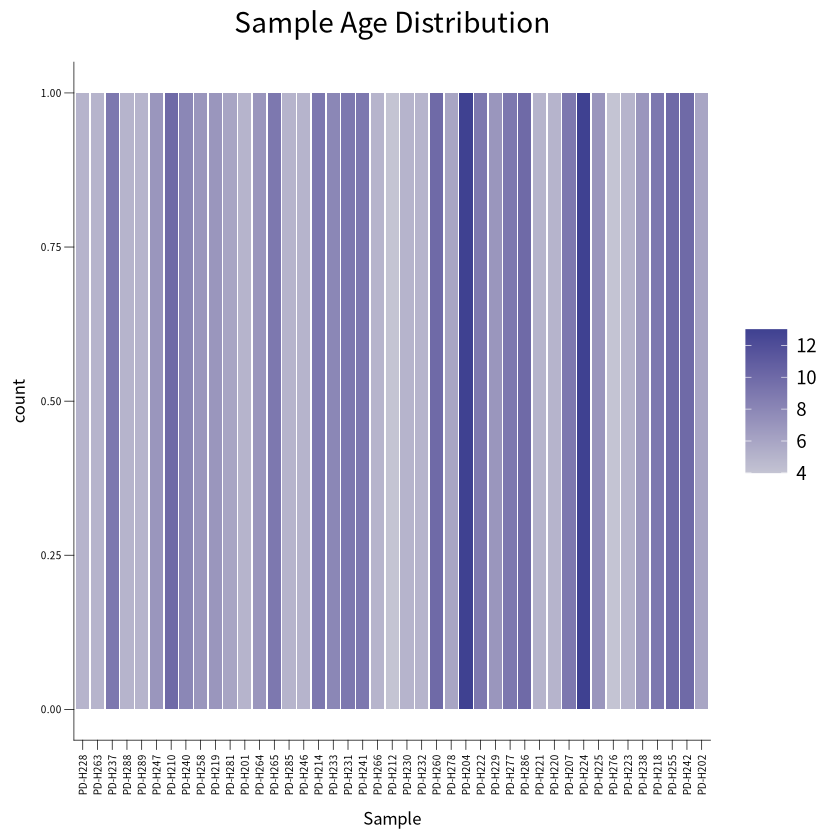

In [20]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "right")

p <- ggplot(tmp, aes(x = Sample, fill = `Treat time`)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_gradient(low = '#C4C4D3', high = '#3F4191') +
        labs(title = "Sample Age Distribution") + mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/ART_time.pdf",p,width=15,height=2)

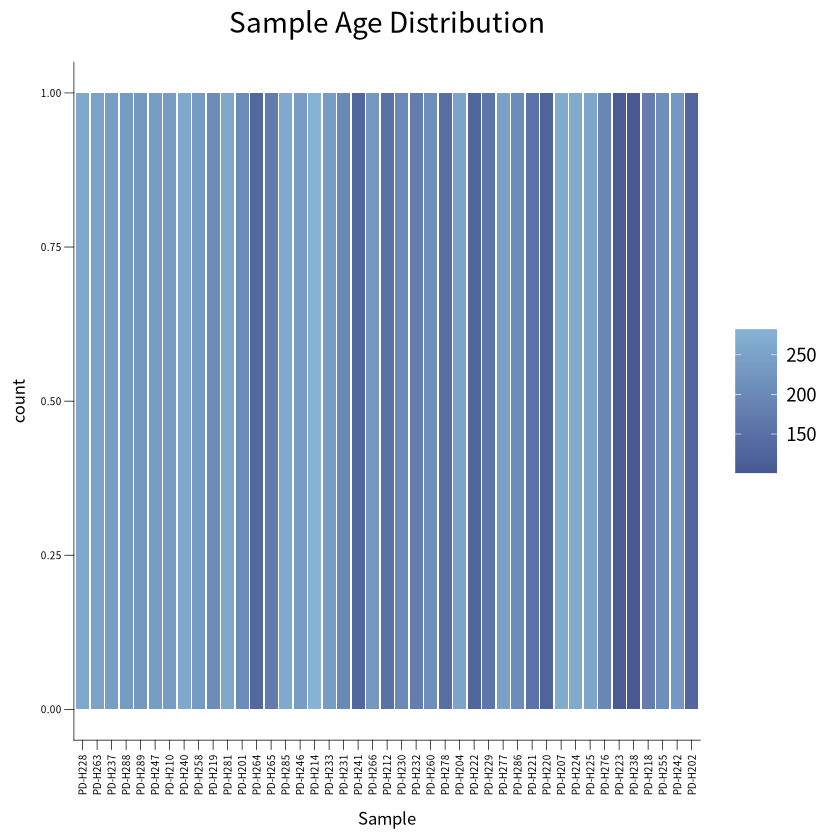

In [17]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "right")

p <- ggplot(tmp, aes(x = Sample, fill = `CD4 count (/μL)`)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_gradient(low = '#485994', high = '#86B3D4') +
        labs(title = "Sample Age Distribution") + mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/CD4_count.pdf",p,width=15,height=2)

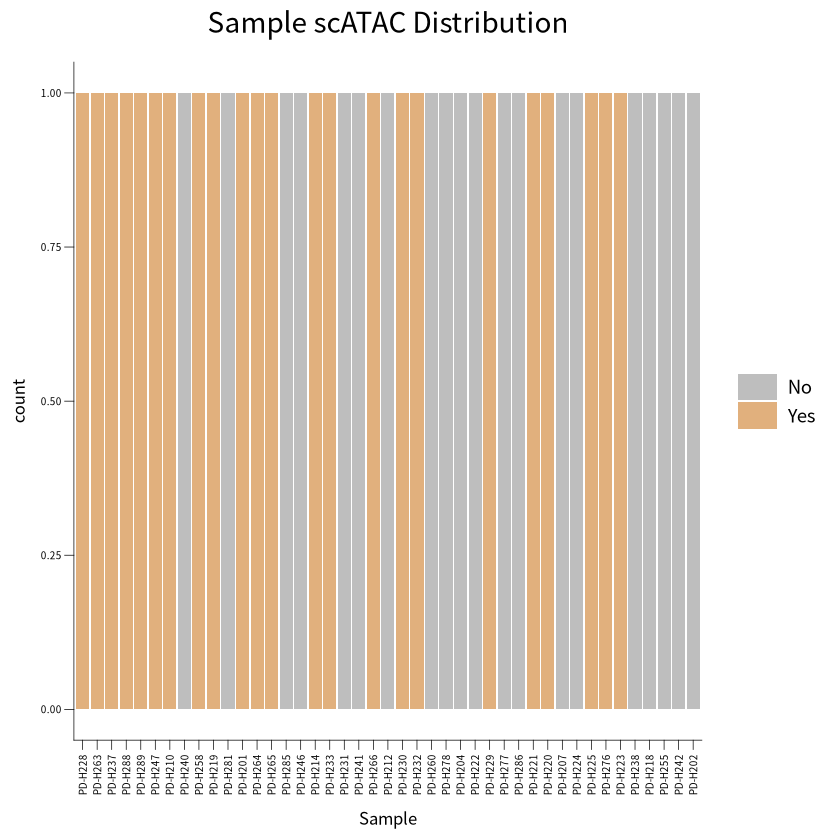

In [23]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "right")

tmp$INSTI <- factor(tmp$INSTI)
p <- ggplot(tmp, aes(x = Sample, fill = INSTI)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('grey', '#E1B07D')) +
        labs(title = "Sample scATAC Distribution") + mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/INSTI.pdf",p,width=15,height=2)

### scRNA-seq

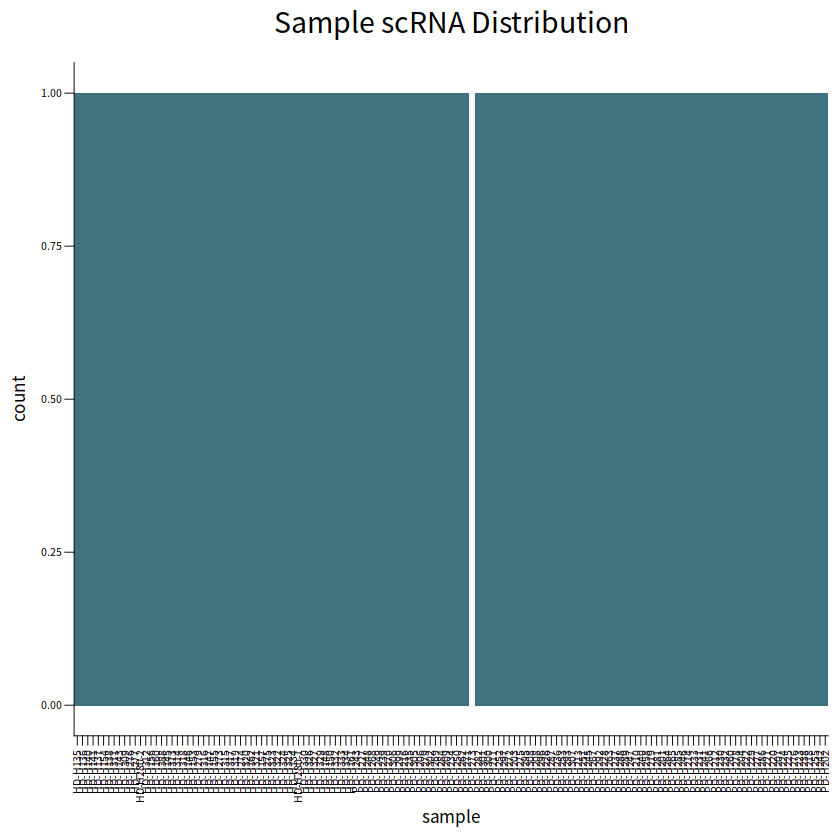

In [60]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

tmp_sorted$scRNA <- factor(tmp_sorted$scRNA)
p <- ggplot(tmp_sorted, aes(x = sample, fill = scRNA)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('white', '#3E727E')) +
        labs(title = "Sample scRNA Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/scRNA.pdf",p,width=15,height=2)

### scATAC-seq

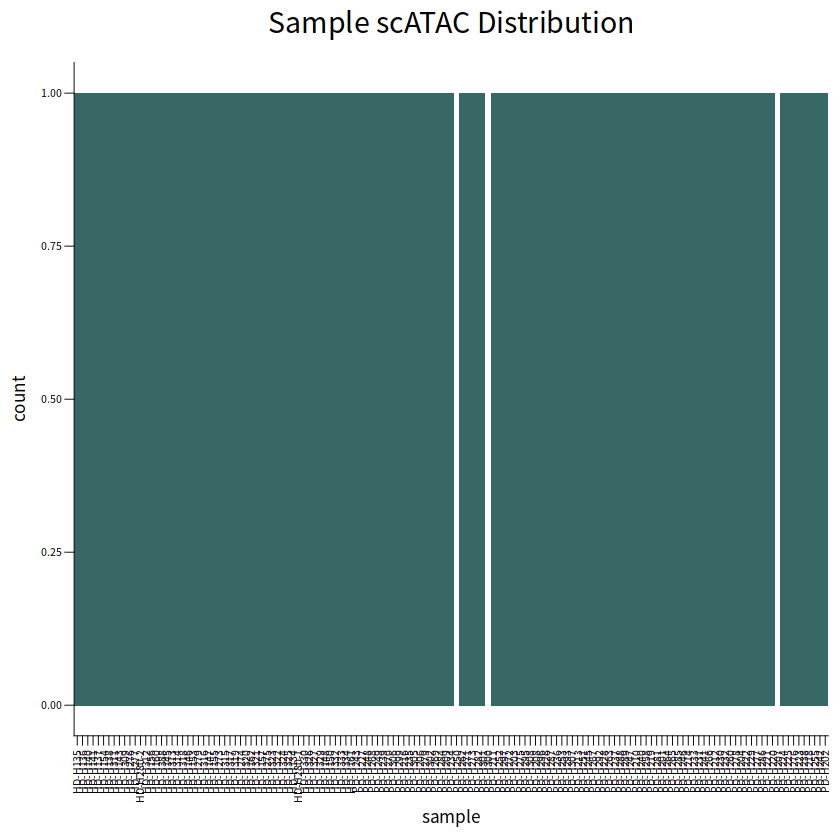

In [61]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

tmp_sorted$scATAC <- factor(tmp_sorted$scATAC)
p <- ggplot(tmp_sorted, aes(x = sample, fill = scATAC)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('white', '#386866')) +
        labs(title = "Sample scATAC Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/scATAC.pdf",p,width=15,height=2)

### WGS

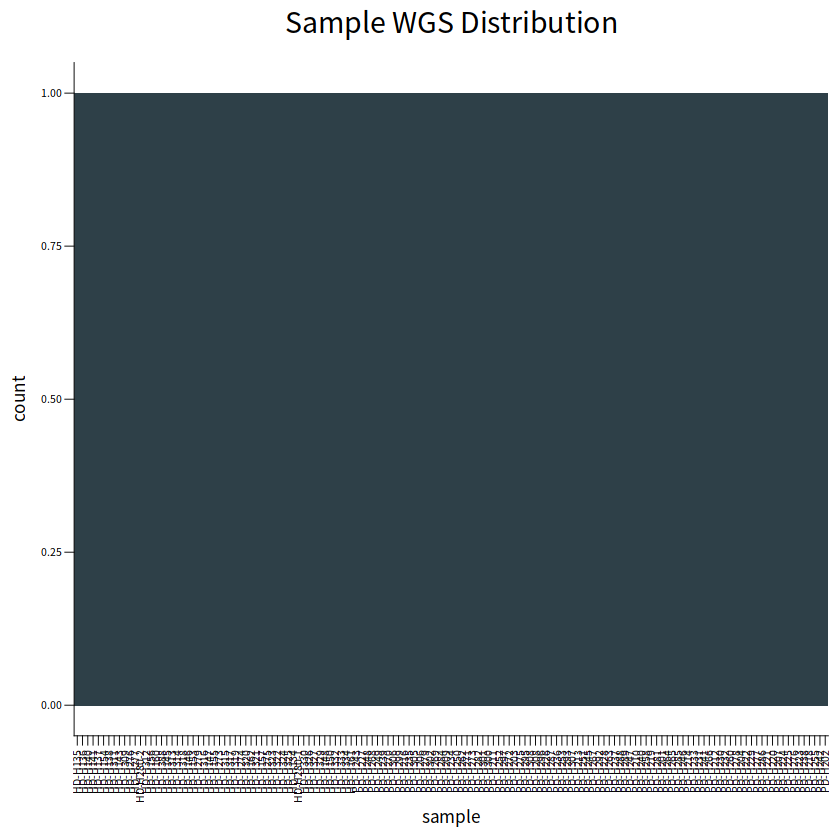

In [66]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

tmp_sorted$WGS <- factor(tmp_sorted$WGS)
p <- ggplot(tmp_sorted, aes(x = sample, fill = WGS)) + geom_bar(stat = "count", position = "dodge") +
        scale_fill_manual(values = c('#2E4048')) +
        labs(title = "Sample WGS Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/WGS.pdf",p,width=15,height=2)

### scRNA-seq细胞数

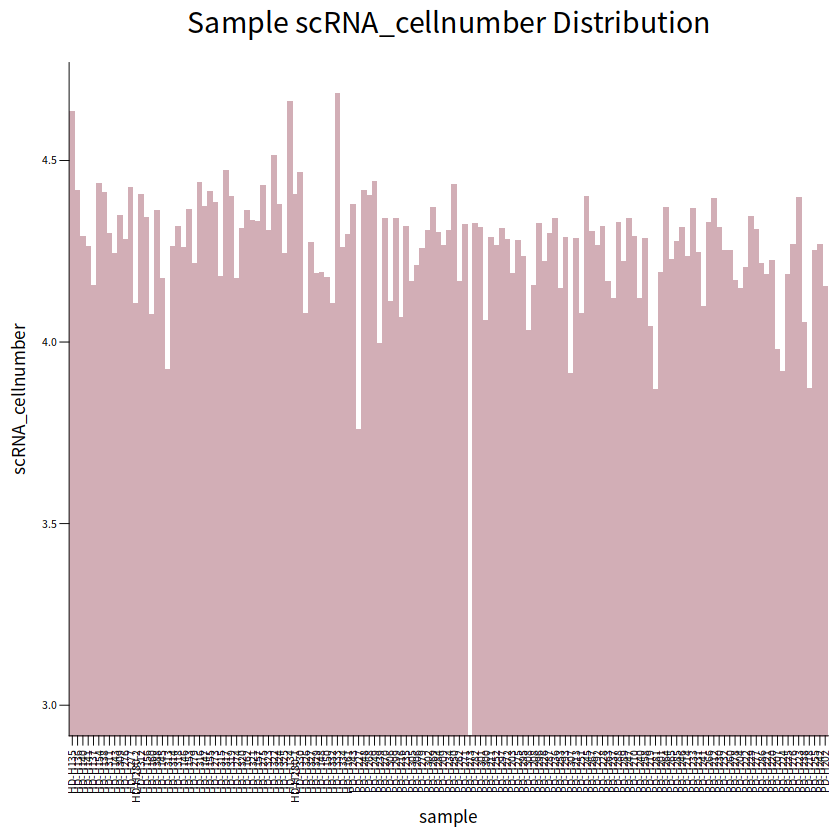

In [92]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")
p <- ggplot(tmp_sorted, aes(x = sample, y = scRNA_cellnumber,fill = sample)) + geom_bar(stat = "identity",position = "dodge",fill="#D2AEB6") +
        coord_cartesian(ylim = c(3, NA)) +
        labs(title = "Sample scRNA_cellnumber Distribution") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/scRNA_cellnumber.pdf",p,width=15,height=2)

### scATAC-seq细胞数

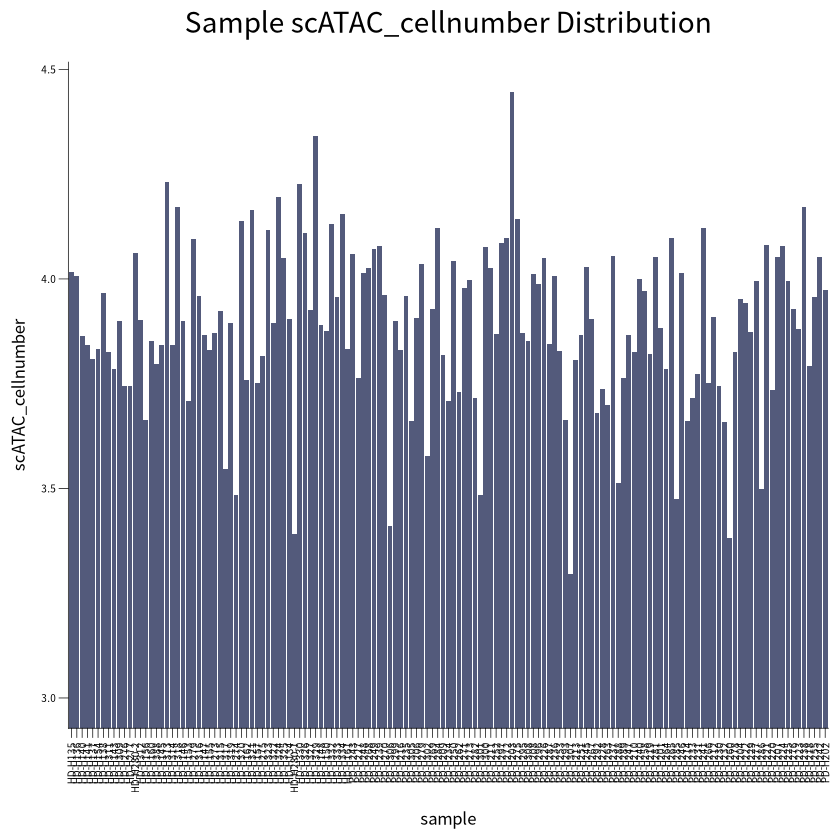

In [185]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")
p <- ggplot(tmp_sorted, aes(x = sample, y = scATAC_cellnumber,fill = sample)) + geom_bar(stat = "identity",position = "dodge",fill="#535A7B") +
        coord_cartesian(ylim = c(3, NA)) +
        labs(title = "Sample scATAC_cellnumber Distribution") + mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/figure/scATAC_cellnumber.pdf",p,width=15,height=2)

### scRNA-seq细胞比例

In [109]:
RNA <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/scRNA_proportions_L1.csv",check.names = F,header = T))
RNA

sample,celltype_L1,count,total_count,proportion
<chr>,<chr>,<int>,<int>,<dbl>
HD-H134,CD4+ T,15620,46020,0.33941764
HD-H134,CD8+ T & unconvensional T,18840,46020,0.40938722
HD-H134,NK,2658,46020,0.05775750
HD-H134,B,3609,46020,0.07842243
HD-H134,Myeloid,5293,46020,0.11501521
HD-H135,CD4+ T,8907,43256,0.20591363
HD-H135,CD8+ T & unconvensional T,19024,43256,0.43980026
HD-H135,NK,3236,43256,0.07481043
HD-H135,B,4590,43256,0.10611245


In [117]:
new_row <- data.frame(
    sample = 'PD-H273',
    celltype_L1 = 'CD4+ T ',
    count = 0,
    total_count = 0,
    proportion = 0)
RNA <- rbind(RNA, new_row)
RNA

sample,celltype_L1,count,total_count,proportion
<fct>,<fct>,<dbl>,<dbl>,<dbl>
HD-H134,CD4+ T,15620,46020,0.33941764
HD-H134,CD8+ T & unconvensional T,18840,46020,0.40938722
HD-H134,NK,2658,46020,0.05775750
HD-H134,B,3609,46020,0.07842243
HD-H134,Myeloid,5293,46020,0.11501521
HD-H135,CD4+ T,8907,43256,0.20591363
HD-H135,CD8+ T & unconvensional T,19024,43256,0.43980026
HD-H135,NK,3236,43256,0.07481043
HD-H135,B,4590,43256,0.10611245


In [118]:
RNA$sample <- factor(RNA$sample, levels = tmp_sorted$sample)
RNA$celltype_L1 <- factor(RNA$celltype_L1, levels = c("CD4+ T","CD8+ T & unconvensional T","NK","Myeloid","B"))
RNA

sample,celltype_L1,count,total_count,proportion
<fct>,<fct>,<dbl>,<dbl>,<dbl>
HD-H134,CD4+ T,15620,46020,0.33941764
HD-H134,CD8+ T & unconvensional T,18840,46020,0.40938722
HD-H134,NK,2658,46020,0.05775750
HD-H134,B,3609,46020,0.07842243
HD-H134,Myeloid,5293,46020,0.11501521
HD-H135,CD4+ T,8907,43256,0.20591363
HD-H135,CD8+ T & unconvensional T,19024,43256,0.43980026
HD-H135,NK,3236,43256,0.07481043
HD-H135,B,4590,43256,0.10611245


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


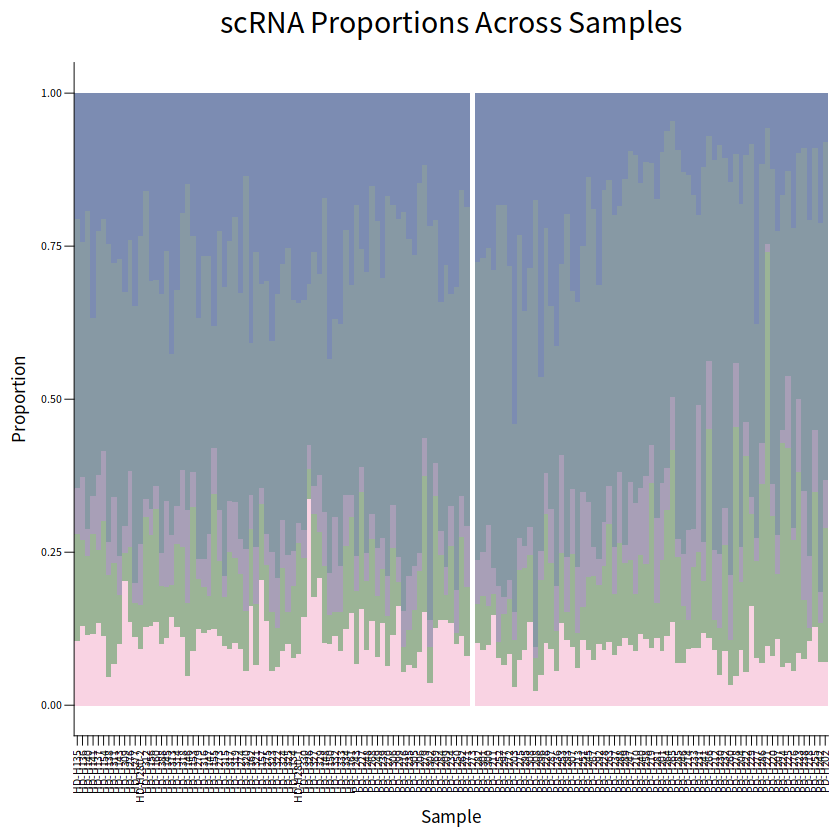

In [119]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")
p <- ggplot(RNA, aes(x = sample, y = proportion, fill = celltype_L1)) + geom_bar(stat = "identity", position = "fill") +
            scale_fill_manual(values = c("#7C8CB2","#8799A4","#A89FB7","#9BB496","#F9D3E3")) +
            labs(title = "scRNA Proportions Across Samples", x = "Sample", y = "Proportion") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/scRNA_proportion.pdf",p,width=15,height=2)

### scATAC-seq细胞比例

In [210]:
ATAC <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scATAC_proportions_L1.csv",check.names = F,header = T))
ATAC

people,celltypesL1_frL3,count,total_count,proportion
<chr>,<chr>,<int>,<int>,<dbl>
HD-H134,B,500,8038,0.06220453
HD-H134,CD4+ T,1962,8038,0.24409057
HD-H134,CD8+ T & unconventional T,2282,8038,0.28390147
HD-H134,Myeloid,2986,8038,0.37148544
HD-H134,NK,308,8038,0.03831799
HD-H135,B,786,10388,0.07566423
HD-H135,CD4+ T,1290,10388,0.12418175
HD-H135,CD8+ T & unconventional T,4160,10388,0.40046207
HD-H135,Myeloid,3703,10388,0.35646900


In [213]:
ATAC$sample <- factor(ATAC$people, levels = tmp_sorted$sample)
ATAC$celltype_L1 <- factor(ATAC$celltypesL1_frL3, levels = c("CD4+ T","CD8+ T & unconventional T","NK","Myeloid","B"))
ATAC

people,celltypesL1_frL3,count,total_count,proportion,celltype_L1,sample
<fct>,<chr>,<int>,<int>,<dbl>,<fct>,<fct>
HD-H134,B,500,8038,0.06220453,B,HD-H134
HD-H134,CD4+ T,1962,8038,0.24409057,CD4+ T,HD-H134
HD-H134,CD8+ T & unconventional T,2282,8038,0.28390147,CD8+ T & unconventional T,HD-H134
HD-H134,Myeloid,2986,8038,0.37148544,Myeloid,HD-H134
HD-H134,NK,308,8038,0.03831799,NK,HD-H134
HD-H135,B,786,10388,0.07566423,B,HD-H135
HD-H135,CD4+ T,1290,10388,0.12418175,CD4+ T,HD-H135
HD-H135,CD8+ T & unconventional T,4160,10388,0.40046207,CD8+ T & unconventional T,HD-H135
HD-H135,Myeloid,3703,10388,0.35646900,Myeloid,HD-H135


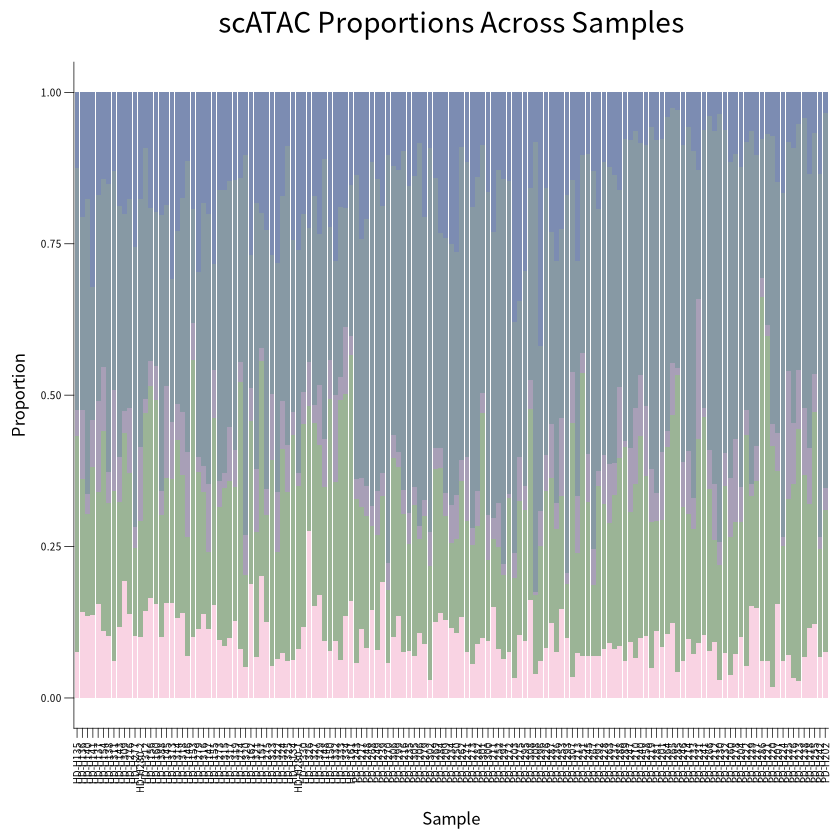

In [215]:
# 绘制柱状图
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6,angle=90,vjust = 0.5,hjust = 1),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")
p <- ggplot(ATAC, aes(x = sample, y = proportion, fill = celltype_L1)) + geom_bar(stat = "identity", position = "fill") +
            scale_fill_manual(values = c("#7C8CB2","#8799A4","#A89FB7","#9BB496","#F9D3E3")) +
            labs(title = "scATAC Proportions Across Samples", x = "Sample", y = "Proportion") + mytheme
p
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/figure/scATAC_proportion.pdf",p,width=15,height=2)

### 样本信息

In [46]:
tmp <- as.data.frame(read.csv("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/sample_information.csv",check.names = F,header = T))
tmp$stage <- factor(tmp$stage, levels = c("HDs","IRs","INRs"))
tmp

sample,sex,age,stage,scRNA,scATAC,WGS,scRNA_cellnumber,scATAC_cellnumber,ART_time,CD4,CD8,CD4/CD8
<chr>,<chr>,<int>,<fct>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>
HD-H134,male,53,HDs,1,1,1,46020,8038,NA,579,319,1.8150470
HD-H135,male,26,HDs,1,1,1,43256,10389,NA,595,754,0.7891247
HD-H136,male,28,HDs,1,1,1,26197,10146,NA,1035,428,2.4182243
HD-H137,male,31,HDs,1,1,1,14338,6431,NA,852,779,1.0937099
HD-H138,male,32,HDs,1,1,1,25807,9235,NA,667,1040,0.6413462
HD-H140,male,28,HDs,1,1,1,19559,7292,NA,908,603,1.5058043
HD-H141,male,29,HDs,1,1,1,18360,6954,NA,1064,445,2.3910112
HD-H143,male,33,HDs,1,1,1,17570,6081,NA,889,1144,0.7770979
HD-H145,male,39,HDs,1,1,1,14954,6963,NA,576,581,0.9913941


In [47]:
mytheme <- theme_prism(base_family="",base_fontface="plain") +
  theme(strip.text = element_text(size = 8,angle=10,vjust = 0.5,hjust = 0.5),
        axis.line = element_line(color = "black",size = 0.2),
        axis.ticks = element_line(size = 0.2),
        axis.text.y = element_text(color = "black",size = 6),
        axis.text.x = element_text(color = "black",size = 6),
        axis.title = element_text(color = "black",size = 10),
        legend.position = "none")

In [78]:
age_counts

age,count
<int>,<int>
26,2
27,3
28,4
29,2
30,1
31,4
32,2
33,5
34,1


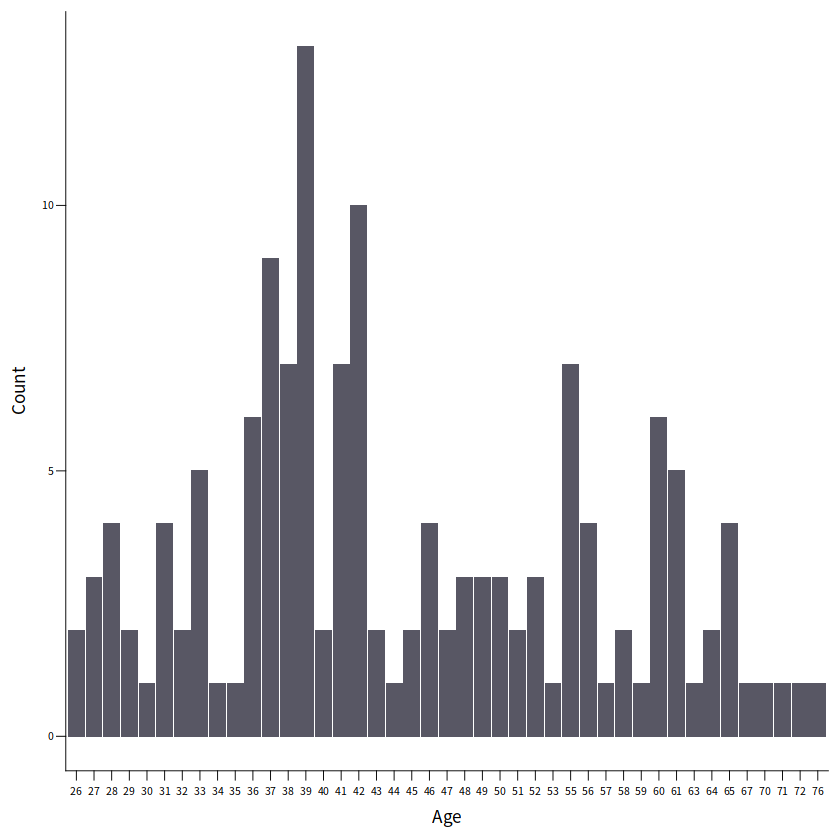

In [77]:
# 年龄分布
age_counts <- tmp %>%
  group_by(age) %>%
  summarise(count = n())
p <- ggplot(age_counts, aes(x = factor(age), y = count)) + geom_bar(stat = "identity",fill="#585764") + 
     labs(x = "Age", y = "Count") + mytheme
p
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/年龄分布.pdf",p,width=5,height=3)

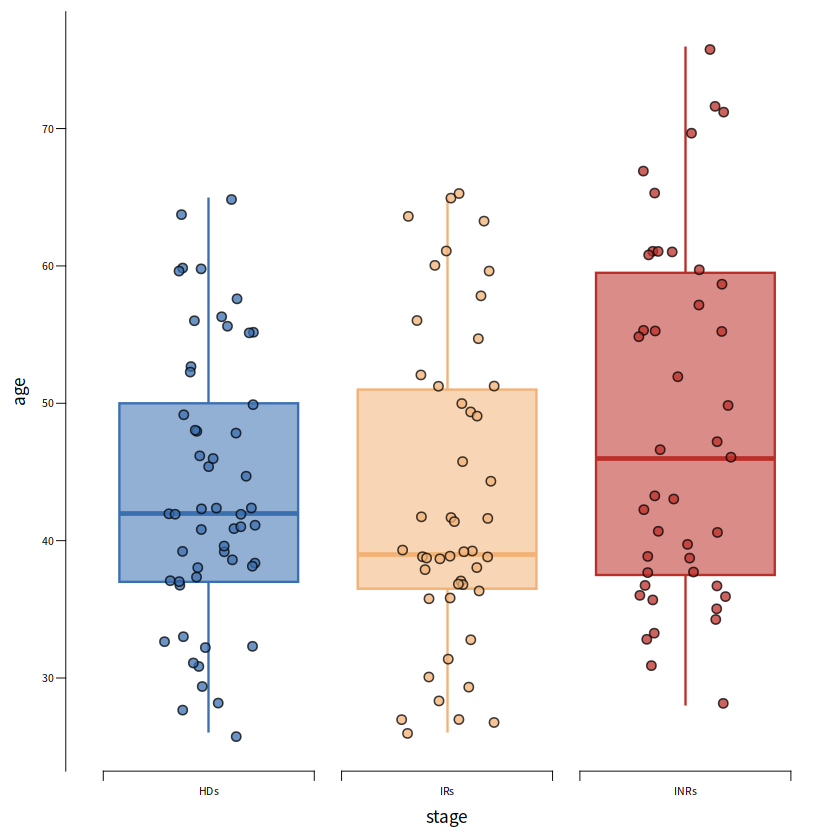

In [60]:
# age
p <- ggplot(tmp,aes(x = stage,y = age)) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_x_discrete(guide = "prism_bracket") + mytheme
df_p_val <- tmp %>% wilcox_test(age ~ stage) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001,0.01,0.05,1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08)
p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)
p2
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/age_boxplot.pdf",p2,width=2.5,height=3)

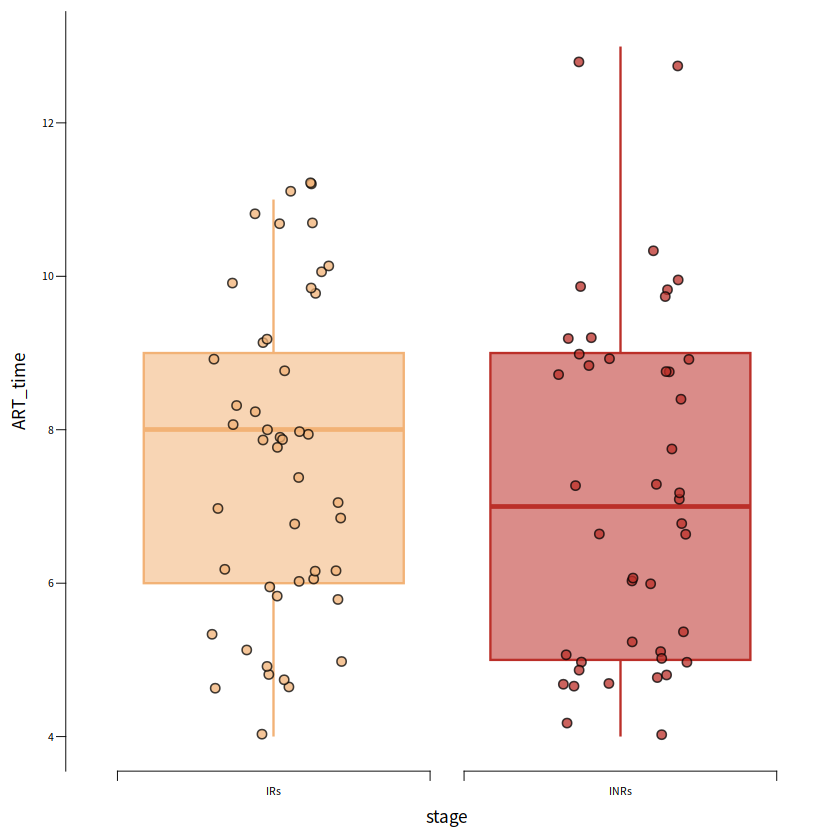

In [61]:
# ART Time
subtmp <- subset(tmp,stage %in% c("IRs","INRs"))
subtmp$stage <- factor(subtmp$stage,levels = c("IRs","INRs"))
p <- ggplot(subtmp,aes(x = stage,y = ART_time)) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#F2B276','#BB2F29')) + 
      scale_x_discrete(guide = "prism_bracket") + mytheme
df_p_val <- subtmp %>% wilcox_test(ART_time ~ stage) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001,0.01,0.05,1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08)
p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)
p2
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/ART_time_boxplot.pdf",p2,width=2,height=3)

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


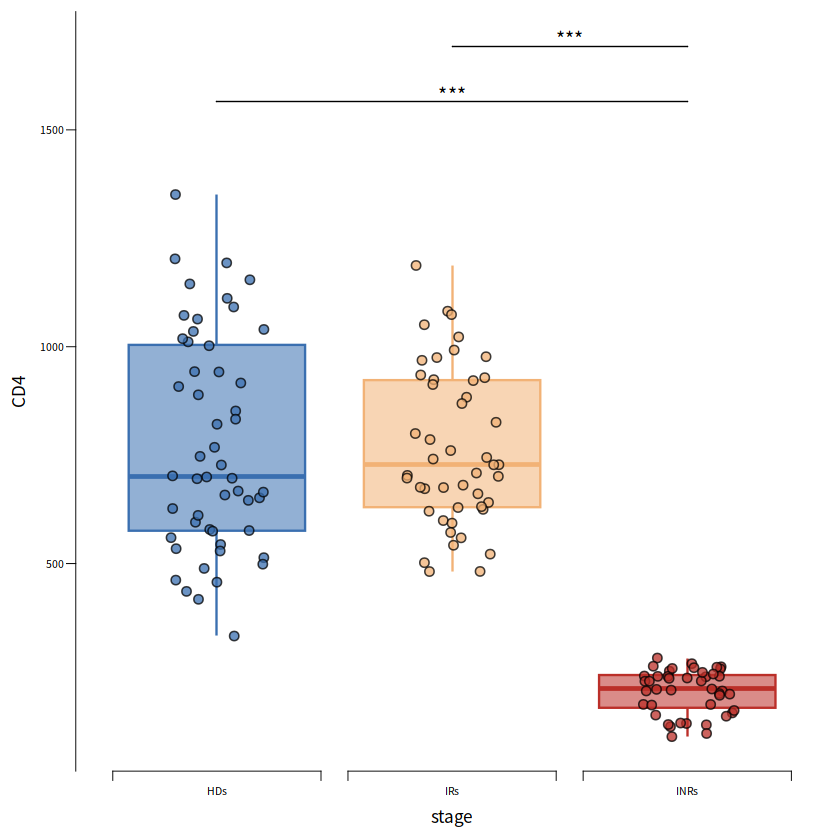

In [62]:
# CD4
p <- ggplot(tmp,aes(x = stage,y = CD4)) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_x_discrete(guide = "prism_bracket") + mytheme
df_p_val <- tmp %>% wilcox_test(CD4 ~ stage) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001,0.01,0.05,1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08)
p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)
p2
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/CD4_boxplot.pdf",p2,width=2.5,height=3)

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


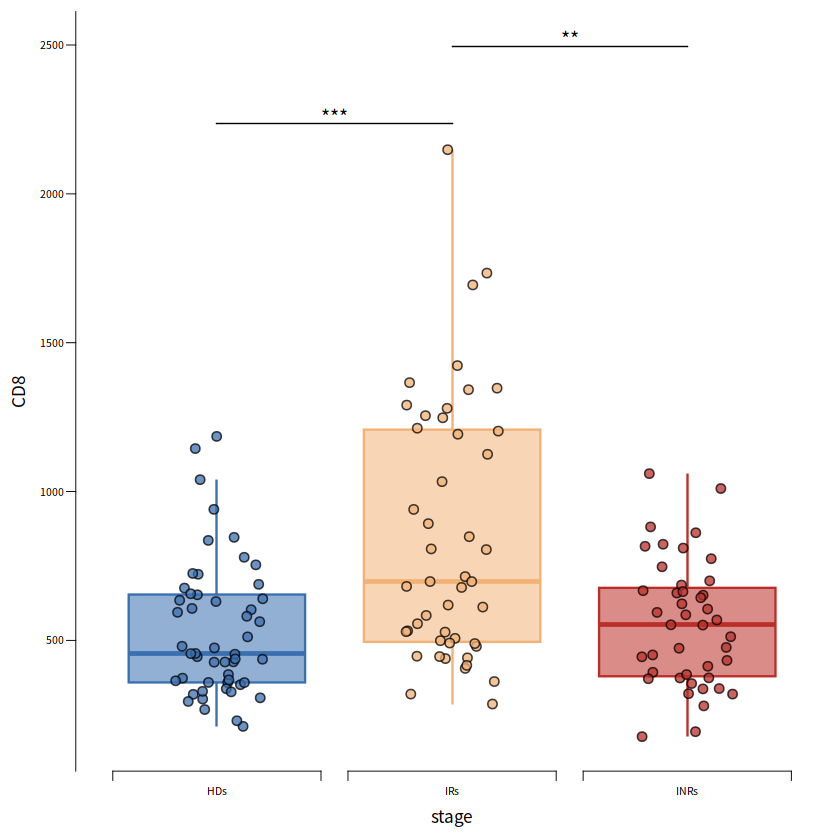

In [63]:
# CD8
p <- ggplot(tmp,aes(x = stage,y = CD8)) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_x_discrete(guide = "prism_bracket") + mytheme
df_p_val <- tmp %>% wilcox_test(CD8 ~ stage) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001,0.01,0.05,1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08)
p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)
p2
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/CD8_boxplot.pdf",p2,width=2.5,height=3)

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


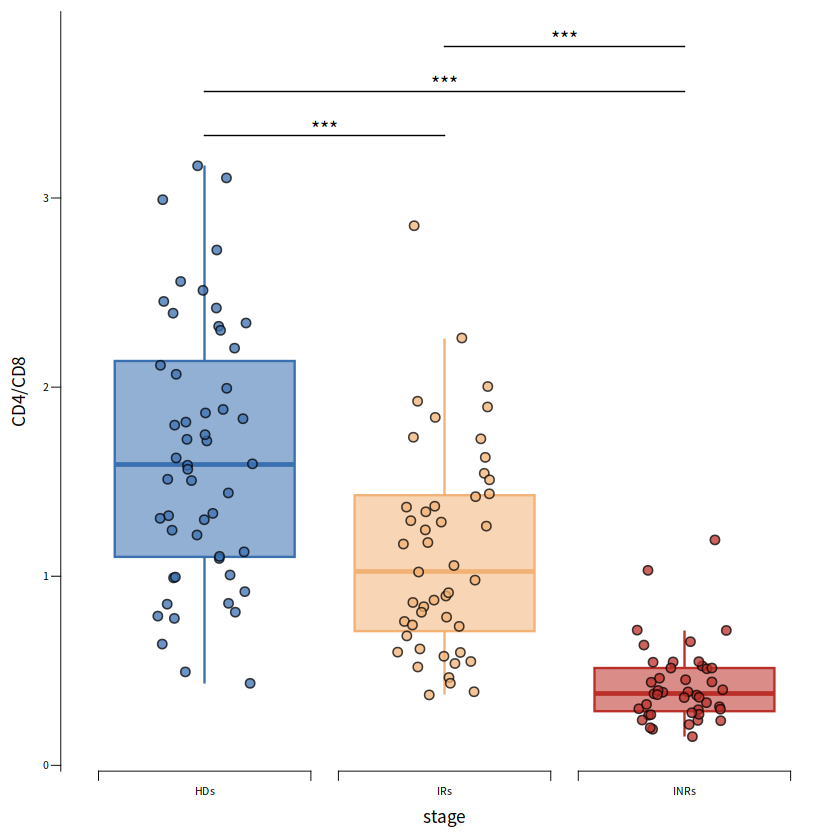

In [64]:
# CD4/CD8
p <- ggplot(tmp,aes(x = stage,y = CD4/CD8)) +
      geom_boxplot(aes(color = stage,fill = stage,alpha= 0.25),position = position_dodge(width = 0.8),outlier.shape = NA) + 
      geom_point(aes(fill = stage),pch = 21,size = 2 ,alpha= 0.75,position = position_jitter(0.2))+
      scale_color_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_fill_manual(values = c('#3A6FB0','#F2B276','#BB2F29')) + 
      scale_x_discrete(guide = "prism_bracket") + mytheme
df_p_val <- tmp %>% wilcox_test(CD4/CD8 ~ stage) %>%
      adjust_pvalue(p.col = "p", method = "BH") %>%
      add_significance(p.col = "p.adj",cutpoints = c(0,0.001,0.01,0.05,1),symbols = c("***", "**", "*", "ns")) %>% 
      add_xy_position(step.increase = 0.08)
p2 <- p + stat_pvalue_manual(df_p_val,label = "p.adj.signif",label.size = 4,hide.ns = T,tip.length=0)
p2
ggsave("/media/AnalysisDisk1/Yanshichen/0_HIV_RNA/样本统计/figure/CD4vsCD8_boxplot.pdf",p2,width=2.5,height=3)

### 细胞比例热图

In [314]:
data <- as.data.frame(read.csv("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/scATAC_proportions_L3.csv",check.names = F,header = T))
data <- data[,-c(3,4)]

In [315]:
data$stage <- data$sample
data$stage[data$stage %in% c('HD-H134','HD-H135','HD-H136','HD-H137','HD-H138','HD-H140','HD-H141','HD-H143',
                             'HD-H145','HD-H146','HD-H147','HD-H148','HD-H150','HD-H153','HD-H154','HD-H155',
                             'HD-H156','HD-H157','HD-H160','HD-H161','HD-H162','HD-H273','HD-H274','HD-H275',
                             'HD-H276','HD-H277','HD-H279','HD-H280-1','HD-H280-2','HD-H309','HD-H311','HD-H312',
                             'HD-H313','HD-H314','HD-H315','HD-H316','HD-H317','HD-H318','HD-H319','HD-H320',
                             'HD-H321','HD-H322','HD-H323','HD-H324','HD-H325','HD-H326','HD-H327','HD-H329',
                             'HD-H330','HD-H332','HD-H333','HD-H334','HD-H388')] <- "HDs"
data$stage[data$stage %in% c('PD-H201','PD-H202','PD-H204','PD-H207','PD-H210','PD-H212','PD-H214','PD-H218',
                             'PD-H219','PD-H220','PD-H221','PD-H222','PD-H223','PD-H224','PD-H225','PD-H228',
                             'PD-H229','PD-H230','PD-H231','PD-H232','PD-H233','PD-H237','PD-H238','PD-H240',
                             'PD-H241','PD-H242','PD-H246','PD-H247','PD-H255','PD-H258','PD-H260','PD-H263',
                             'PD-H264','PD-H265','PD-H266','PD-H276','PD-H277','PD-H278','PD-H281','PD-H285',
                             'PD-H286','PD-H288','PD-H289','PD-H273')] <- "INRs"
data$stage[data$stage %in% c('PD-H203','PD-H206','PD-H208','PD-H209','PD-H211','PD-H213','PD-H216','PD-H226',
                             'PD-H227','PD-H234','PD-H235','PD-H236','PD-H239','PD-H243','PD-H245','PD-H248',
                             'PD-H249','PD-H250','PD-H251','PD-H252','PD-H253','PD-H262','PD-H267','PD-H268',
                             'PD-H269','PD-H270','PD-H271','PD-H272','PD-H273','PD-H275','PD-H279','PD-H282',
                             'PD-H284','PD-H287','PD-H292','PD-H293','PD-H295','PD-H296','PD-H297','PD-H299',
                             'PD-H300','PD-H301','PD-H302','PD-H305','PD-H306','PD-H307','PD-H308')] <- "IRs"
data$stage <- factor(data$stage,levels = c("HDs",'IRs',"INRs"))
data

sample,celltype_L3,proportion,stage
<chr>,<chr>,<dbl>,<fct>
HD-H134,Aptypical_Memory_B-ITGAX,0.0002488181,HDs
HD-H134,CD4_Naive_T-CCR7,0.1448121423,HDs
HD-H134,CD4_Naive_T-SOX4,0.0000000000,HDs
HD-H134,CD4_Tcm-CXCR5,0.0221448121,HDs
HD-H134,CD4_Tcm-GPR183,0.0060960438,HDs
HD-H134,CD4_Tcm-IFIT3,0.0014929087,HDs
HD-H134,CD4_Tcm-SOX4,0.0000000000,HDs
HD-H134,CD4_Tem-CCR7neg,0.0109479970,HDs
HD-H134,CD4_Tfh_like-CXCR5,0.0060960438,HDs


#### 计算log2FC

In [316]:
average_proportion <- data %>%
  group_by(celltype_L3, stage) %>%
  summarize(mean_proportion = mean(proportion, na.rm = TRUE))
average_proportion

`summarise()` has grouped output by 'celltype_L3'. You can override using the
`.groups` argument.


celltype_L3,stage,mean_proportion
<chr>,<fct>,<dbl>
Aptypical_Memory_B-ITGAX,HDs,4.698371e-03
Aptypical_Memory_B-ITGAX,IRs,3.512448e-03
Aptypical_Memory_B-ITGAX,INRs,1.897593e-03
CD4_Naive_T-CCR7,HDs,9.174300e-02
CD4_Naive_T-CCR7,IRs,8.954219e-02
CD4_Naive_T-CCR7,INRs,3.041989e-02
CD4_Naive_T-SOX4,HDs,6.370493e-06
CD4_Naive_T-SOX4,IRs,8.670751e-06
CD4_Naive_T-SOX4,INRs,3.436237e-06


In [317]:
log2_ratios <- average_proportion %>%
  pivot_wider(names_from = stage, values_from = mean_proportion) %>%
  mutate(log2_IR_HD = log2(IRs / HDs),
         log2_INR_HD = log2(INRs / HDs),
         log2_INR_IR = log2(INRs / IRs))
log2_ratios <- as.data.frame(log2_ratios)
rownames(log2_ratios) <- log2_ratios$celltype_L3
log2_ratios <- as.data.frame(log2_ratios[,-c(1,2,3,4)])
log2_ratios <- as.matrix(log2_ratios)
log2_ratios <- na.omit(log2_ratios)
log2_ratios

,log2_IR_HD,log2_INR_HD,log2_INR_IR
Aptypical_Memory_B-ITGAX,-0.41968365,-1.30799002,-0.8883063629
CD4_Naive_T-CCR7,-0.03503034,-1.59258295,-1.5575526187
CD4_Naive_T-SOX4,0.44475185,-0.89057548,-1.3353273301
CD4_Tcm-CXCR5,-0.07080790,-0.99379069,-0.9229827843
CD4_Tcm-GPR183,0.64563891,0.02549920,-0.6201397080
CD4_Tcm-IFIT3,0.03454220,-1.95132869,-1.9858708898
CD4_Tcm-SOX4,3.37373015,2.69395789,-0.6797722612
CD4_Tem-CCR7neg,-1.83645064,-2.94704141,-1.1105907710
CD4_Tfh_like-CXCR5,0.25883507,0.16255968,-0.0962753840
CD4_Th-TNFRSF11A,-0.30137116,-1.50197574,-1.2006045797


In [318]:
max(log2_ratios)
min(log2_ratios)

[1] 3.37373

[1] -2.947041

#### 计算padj

In [319]:
p_values <- data %>%
  spread(stage, proportion) %>%
  group_by(celltype_L3) %>%
  summarize(
    p_value_IRs_vs_HDs = wilcox.test(IRs, HDs)$p.value,
    p_value_INRs_vs_HDs = wilcox.test(INRs, HDs)$p.value,
    p_value_INRs_vs_IRs = wilcox.test(INRs, IRs)$p.value
  )
p_values

Warning message:
“There were 29 warnings in `summarize()`.
The first warning was:
ℹ In argument: `p_value_INRs_vs_IRs = wilcox.test(INRs, IRs)$p.value`.
ℹ In group 1: `celltype_L3 = "Aptypical_Memory_B-ITGAX"`.
Caused by warning in `wilcox.test.default()`:
! 无法精确计算带连结的p值
ℹ Run `dplyr::last_dplyr_warnings()` to see the 28 remaining warnings.”


celltype_L3,p_value_IRs_vs_HDs,p_value_INRs_vs_HDs,p_value_INRs_vs_IRs
<chr>,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,1.637279e-01,3.344935e-05,7.997799e-03
CD4_Naive_T-CCR7,5.073383e-01,3.552231e-13,2.317448e-12
CD4_Naive_T-SOX4,7.886405e-01,4.302566e-01,5.946685e-01
CD4_Tcm-CXCR5,1.378540e-01,4.660993e-07,3.067899e-04
CD4_Tcm-GPR183,3.043694e-02,8.933586e-01,6.613928e-02
CD4_Tcm-IFIT3,2.383249e-03,3.603544e-05,2.279913e-01
CD4_Tcm-SOX4,6.772941e-06,1.796743e-04,6.263467e-01
CD4_Tem-CCR7neg,7.661381e-11,5.491667e-15,3.282832e-05
CD4_Tfh_like-CXCR5,1.168767e-01,3.905167e-01,6.383610e-01


In [320]:
p_values_adjusted <- p_values %>%
  mutate(
    p_value_IRs_vs_HDs_adj = p.adjust(p_value_IRs_vs_HDs, method = "BH"),
    p_value_INRs_vs_HDs_adj = p.adjust(p_value_INRs_vs_HDs, method = "BH"),
    p_value_INRs_vs_IRs_adj = p.adjust(p_value_INRs_vs_IRs, method = "BH")
  )
p_values_adjusted

celltype_L3,p_value_IRs_vs_HDs,p_value_INRs_vs_HDs,p_value_INRs_vs_IRs,p_value_IRs_vs_HDs_adj,p_value_INRs_vs_HDs_adj,p_value_INRs_vs_IRs_adj
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Aptypical_Memory_B-ITGAX,1.637279e-01,3.344935e-05,7.997799e-03,2.947102e-01,1.769012e-04,3.322163e-02
CD4_Naive_T-CCR7,5.073383e-01,3.552231e-13,2.317448e-12,6.226425e-01,9.591023e-12,1.251422e-10
CD4_Naive_T-SOX4,7.886405e-01,4.302566e-01,5.946685e-01,8.517317e-01,5.180877e-01,7.660332e-01
CD4_Tcm-CXCR5,1.378540e-01,4.660993e-07,3.067899e-04,2.566937e-01,5.033872e-06,2.366665e-03
CD4_Tcm-GPR183,3.043694e-02,8.933586e-01,6.613928e-02,7.146065e-02,9.219015e-01,2.100895e-01
CD4_Tcm-IFIT3,2.383249e-03,3.603544e-05,2.279913e-01,9.968994e-03,1.769012e-04,5.352840e-01
CD4_Tcm-SOX4,6.772941e-06,1.796743e-04,6.263467e-01,1.219129e-04,6.930295e-04,7.660332e-01
CD4_Tem-CCR7neg,7.661381e-11,5.491667e-15,3.282832e-05,4.137146e-09,2.965500e-13,4.431823e-04
CD4_Tfh_like-CXCR5,1.168767e-01,3.905167e-01,6.383610e-01,2.254051e-01,4.904164e-01,7.660332e-01


In [321]:
p_values_adjusted <- as.data.frame(p_values_adjusted)
rownames(p_values_adjusted) <- p_values_adjusted$celltype_L3
p_values_adjusted <- as.data.frame(p_values_adjusted[,-c(1,2,3,4)])
p_values_adjusted <- as.matrix(p_values_adjusted)
p_values_adjusted

,p_value_IRs_vs_HDs_adj,p_value_INRs_vs_HDs_adj,p_value_INRs_vs_IRs_adj
Aptypical_Memory_B-ITGAX,2.947102e-01,1.769012e-04,3.322163e-02
CD4_Naive_T-CCR7,6.226425e-01,9.591023e-12,1.251422e-10
CD4_Naive_T-SOX4,8.517317e-01,5.180877e-01,7.660332e-01
CD4_Tcm-CXCR5,2.566937e-01,5.033872e-06,2.366665e-03
CD4_Tcm-GPR183,7.146065e-02,9.219015e-01,2.100895e-01
CD4_Tcm-IFIT3,9.968994e-03,1.769012e-04,5.352840e-01
CD4_Tcm-SOX4,1.219129e-04,6.930295e-04,7.660332e-01
CD4_Tem-CCR7neg,4.137146e-09,2.965500e-13,4.431823e-04
CD4_Tfh_like-CXCR5,2.254051e-01,4.904164e-01,7.660332e-01
CD4_Th-TNFRSF11A,9.125256e-02,8.233676e-05,2.712376e-02


#### 画图

In [322]:
new_order <- c('CD4_Naive_T-CCR7','CD4_Naive_T-SOX4','CD4_Tcm-GPR183','CD4_Tcm-SOX4','CD4_Tcm-CXCR5','CD4_Tcm-IFIT3','CD4_Tem-CCR7neg','CD4_Tfh_like-CXCR5','CD4_Th-TNFRSF11A',
               'CD4_Th1-GZMK','CD4_Th17-RORC','CD4_Th22-CCR10','CD4_Treg-FCRL3','CD4_Treg-FOXP3','CD8_Naive_T-CCR7','CD8_Tcm-GPR183','CD8_Tcm-IFI44L','CD8_Tcm-GZMK','CD8_Tem-GZMK',
               'CD8_CTL-GZMK','CD8_CTL-GZMB','MAIT-SLC4A10','gdT2-GZMK','gdT2-GZMH','gdT2-IL12RB2','Cycling_T-MKI67','NKT-NCR1','NKT-IFIT3','NK_bright-XCL1','Transitional_NK-GZMK',
               'Mature_NK_dim-FCGR3A','cMono-CD14','cMono-IFI44L','ncMono-FCGR3A','ncMono-IFI44L',
               'ncMono-IFIT1','cDC2-CD1C','pDC-LILRA4','pDC-AXL','Naive_B-TCL1A','Naive_B-IFIT3','Transitional_B-NEIL1',
               'Aptypical_Memory_B-ITGAX','Unswitched_Memory_B-CD1C','Unswitched_Memory_B-IFIT3','Unswitched_Memory_B-JAM3','Switched_Memory_B-CD27','Switched_Memory_B-CD86',
               'Switched_Memory_B-IGHE','Plasma_B-IGHA1','Plasma_B-IGHG1','Plasmablast-MKI67')

In [323]:
log2_ratios <- log2_ratios[new_order, ]
p_values_adjusted <- p_values_adjusted[new_order, ]

In [324]:
log2_ratios <- t(log2_ratios)
log2_ratios

,CD4_Naive_T-CCR7,CD4_Naive_T-SOX4,CD4_Tcm-GPR183,CD4_Tcm-SOX4,CD4_Tcm-CXCR5,CD4_Tcm-IFIT3,CD4_Tem-CCR7neg,CD4_Tfh_like-CXCR5,CD4_Th-TNFRSF11A,CD4_Th1-GZMK,⋯,Aptypical_Memory_B-ITGAX,Unswitched_Memory_B-CD1C,Unswitched_Memory_B-IFIT3,Unswitched_Memory_B-JAM3,Switched_Memory_B-CD27,Switched_Memory_B-CD86,Switched_Memory_B-IGHE,Plasma_B-IGHA1,Plasma_B-IGHG1,Plasmablast-MKI67
log2_IR_HD,-0.03503034,0.4447519,0.6456389,3.3737301,-0.0708079,0.0345422,-1.836451,0.25883507,-0.3013712,-0.6887573,⋯,-0.4196837,-0.1739268,-1.395242,0.3609358,-0.1131938,0.15316942,0.6694131,1.1018873,0.8016323,1.2217745
log2_INR_HD,-1.59258295,-0.8905755,0.0254992,2.6939579,-0.9937907,-1.9513287,-2.947041,0.16255968,-1.5019757,-1.7151617,⋯,-1.3079900,-0.9818119,-2.490700,-2.3663631,-0.5070985,-0.02390607,0.5646344,0.4135195,-0.3187082,1.4464791
log2_INR_IR,-1.55755262,-1.3353273,-0.6201397,-0.6797723,-0.9229828,-1.9858709,-1.110591,-0.09627538,-1.2006046,-1.0264044,⋯,-0.8883064,-0.8078851,-1.095459,-2.7272990,-0.3939046,-0.17707550,-0.1047786,-0.6883678,-1.1203405,0.2247046


In [325]:
p_values_adjusted <- t(p_values_adjusted)
p_values_adjusted

,CD4_Naive_T-CCR7,CD4_Naive_T-SOX4,CD4_Tcm-GPR183,CD4_Tcm-SOX4,CD4_Tcm-CXCR5,CD4_Tcm-IFIT3,CD4_Tem-CCR7neg,CD4_Tfh_like-CXCR5,CD4_Th-TNFRSF11A,CD4_Th1-GZMK,⋯,Aptypical_Memory_B-ITGAX,Unswitched_Memory_B-CD1C,Unswitched_Memory_B-IFIT3,Unswitched_Memory_B-JAM3,Switched_Memory_B-CD27,Switched_Memory_B-CD86,Switched_Memory_B-IGHE,Plasma_B-IGHA1,Plasma_B-IGHG1,Plasmablast-MKI67
p_value_IRs_vs_HDs_adj,6.226425e-01,0.8517317,0.07146065,0.0001219129,2.566937e-01,0.0099689943,4.137146e-09,0.2254051,9.125256e-02,2.103417e-03,⋯,0.2947102455,7.724813e-01,0.060237946,0.71113453,0.49846253,0.8685948,0.009968994,0.45601636,0.8685948,0.4282344
p_value_INRs_vs_HDs_adj,9.591023e-12,0.5180877,0.92190148,0.0006930295,5.033872e-06,0.0001769012,2.965500e-13,0.4904164,8.233676e-05,1.218161e-05,⋯,0.0001769012,1.276673e-06,0.006540737,0.02706853,0.01505682,0.9739871,0.046490222,0.08817907,0.7483336,0.5816640
p_value_INRs_vs_IRs_adj,1.251422e-10,0.7660332,0.21008947,0.7660331592,2.366665e-03,0.5352839747,4.431823e-04,0.7660332,2.712376e-02,8.074505e-01,⋯,0.0332216256,5.252768e-05,0.766033159,0.01660046,0.12204148,0.8200118,0.766033159,0.75951907,0.7660332,0.8200118


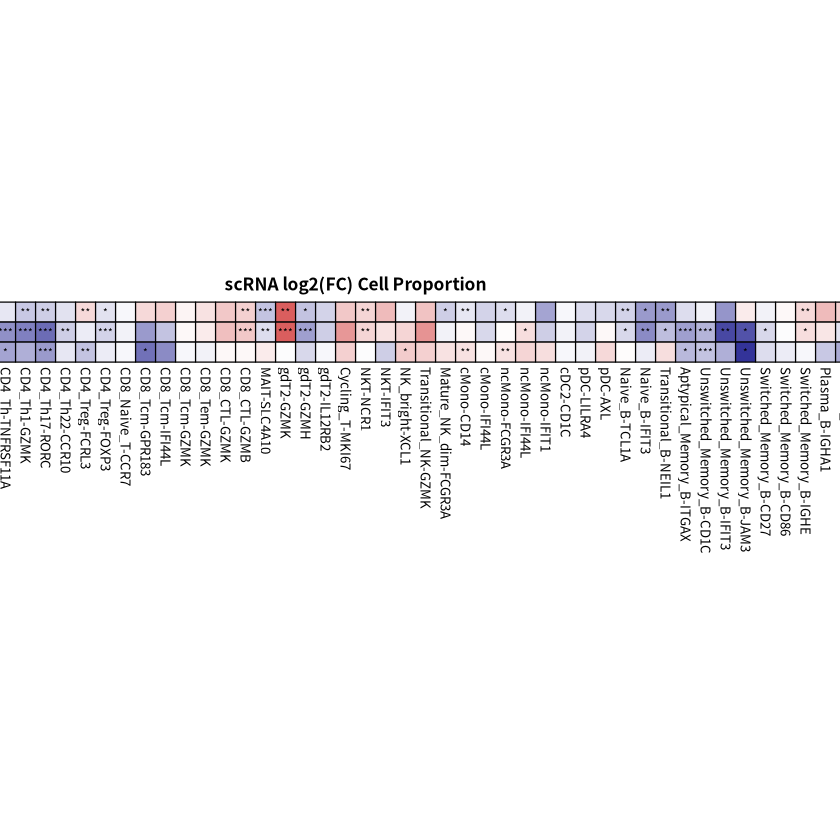

In [327]:
p <- pheatmap(log2_ratios,
              cluster_cols = F,
              cluster_rows = F,
              fontsize = 8,
              breaks = seq(-3.5,3.5,length.out = 100),
              display_numbers = ifelse(p_values_adjusted > 0.01 & p_values_adjusted < 0.05, "*", 
                                       ifelse(p_values_adjusted > 0.001 & p_values_adjusted < 0.01, "**", 
                         x                     (ifelse(p_values_adjusted < 0.001, "***", "")))),
              number_color = "black",
              fontsize_number = 6,
              color = colorRampPalette(c("navy","white","firebrick3"))(100),
              #color = colorRampPalette(c("#78BBE2","white","#DEA1A5"))(100),
              fontsize_col = 8,
              fontsize_row = 8,
              show_colnames = T,
              cellwidth = 12, 
              cellheight = 12,
              main = "scRNA log2(FC) Cell Proportion",
              annotation_legend	= T,
              border = T,
              border_color = "black")
ggsave("/media/AnalysisDisk2/Yangshichen/0_HIV_RNA/样本统计/figure/scATAC_log2(FC)_CellProportion_L3.pdf",p,width=6,height=6)